In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import sys

In [15]:
# reading data files
df_abundance = pd.read_csv('../HW1/input/abundance_table.csv', index_col=0)
df_metadata = pd.read_csv('../HW1/input/metadata_table.csv', index_col=0)
df_mag_data = pd.read_excel('../HW1/input/mag_data_taxa.xlsx', index_col=0)


In [3]:
# Samples and species counts
print(f'Number of samples in abundance table: {df_abundance.shape[0]};\nNumber of bacterial species in abundance table: {df_abundance.shape[1]}')
print('*'*50)

# Top 5 prevalent species
presence_count = (df_abundance > 0).sum(axis=0)
top5_prevalent = presence_count.sort_values(ascending=False).head(5)
print('Top 5 most prevalent species (number of samples present in):')
print(top5_prevalent)
print('*'*50)

# Top 5 species with the highest mean relative abundance
mean_abundance = df_abundance.mean(axis=0)
top5_mean_abundance = mean_abundance.sort_values(ascending=False).head(5)
print('Top 5 species with the highest mean relative abundance:')
print(top5_mean_abundance)

Number of samples in abundance table: 400;
Number of bacterial species in abundance table: 30
**************************************************
Top 5 most prevalent species (number of samples present in):
Lactobacillus acidophilus     76
Bifidobacterium bifidum       73
Roseburia intestinalis        70
Escherichia coli              69
Ruminococcus_D bicirculans    68
dtype: int64
**************************************************
Top 5 species with the highest mean relative abundance:
Lactobacillus acidophilus    0.046176
Ruminococcus_E bromii_B      0.041099
Bifidobacterium bifidum      0.040399
Dialister invisus            0.039670
Eubacterium_R faecale        0.039595
dtype: float64


/tmp/ipykernel_5590/3944438768.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_bar = plt.cm.get_cmap('viridis')(np.linspace(0.3, 0.9, len(top_prevalent_species)))


/tmp/ipykernel_5590/3944438768.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_bar = plt.cm.get_cmap('viridis')(np.linspace(0.3, 0.9, len(top_prevalent_species)))


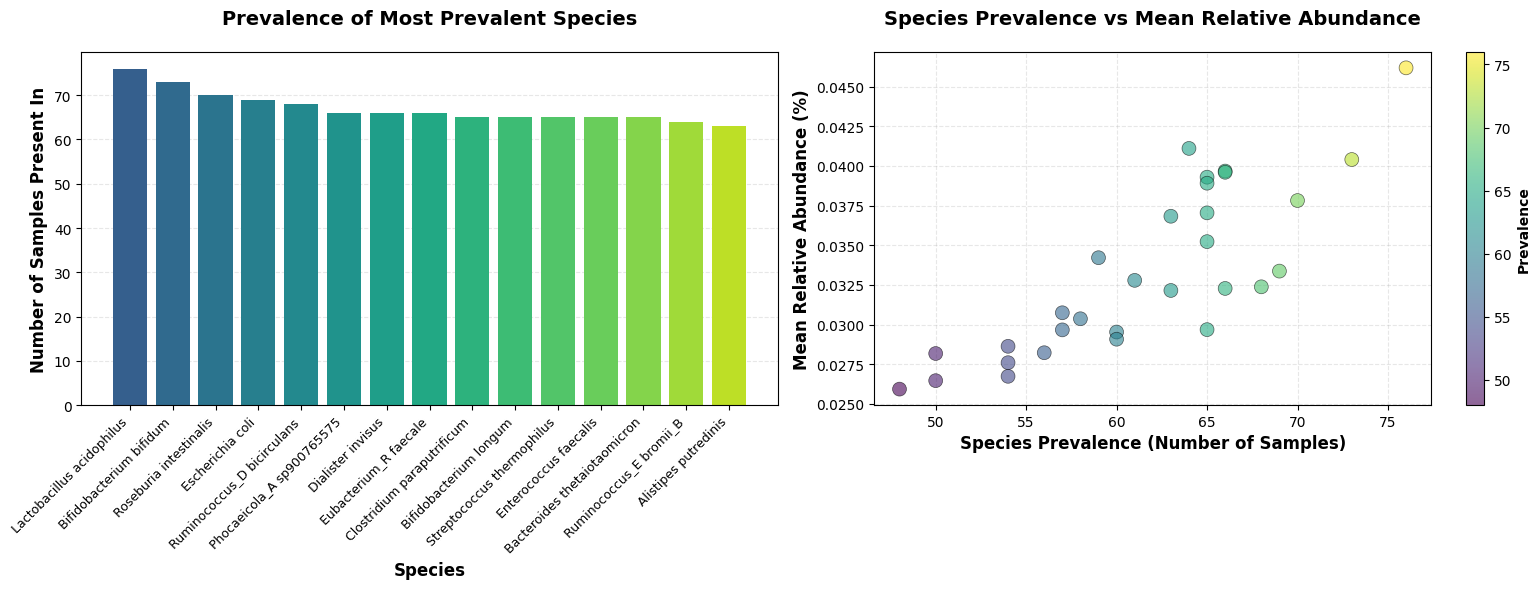

Total number of species plotted in scatter plot: 30
Prevalence range: 48 - 76 samples
Mean relative abundance range: 0.03% - 0.05%


In [7]:
# Calculate species prevalence and mean relative abundance
species_prevalence = (df_abundance > 0).sum(axis=0)
species_mean_abundance = df_abundance.mean(axis=0)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Bar plot of the most prevalent species
top_n = 15  # Show top 15 most prevalent species
top_prevalent_species = species_prevalence.sort_values(ascending=False).head(top_n)
colors_bar = plt.cm.get_cmap('viridis')(np.linspace(0.3, 0.9, len(top_prevalent_species)))
ax1.bar(range(len(top_prevalent_species)), top_prevalent_species.values, color=colors_bar)
ax1.set_xticks(range(len(top_prevalent_species)))
ax1.set_xticklabels(top_prevalent_species.index, rotation=45, ha='right', fontsize=9)
ax1.set_ylabel('Number of Samples Present In', fontsize=12, fontweight='bold')
ax1.set_xlabel('Species', fontsize=12, fontweight='bold')
ax1.set_title('Prevalence of Most Prevalent Species', fontsize=14, fontweight='bold', pad=20)
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.set_axisbelow(True)

# Plot 2: Scatter plot of species prevalence vs mean relative abundance
ax2.scatter(species_prevalence, species_mean_abundance, alpha=0.6, s=100, 
            c=species_prevalence, cmap='viridis', edgecolors='black', linewidth=0.5)
ax2.set_xlabel('Species Prevalence (Number of Samples)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Mean Relative Abundance (%)', fontsize=12, fontweight='bold')
ax2.set_title('Species Prevalence vs Mean Relative Abundance', fontsize=14, fontweight='bold', pad=20)
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_axisbelow(True)

# Add colorbar for the scatter plot
cbar = plt.colorbar(ax2.collections[0], ax=ax2)
cbar.set_label('Prevalence', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../HW1/output/species_prevalence_abundance_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print(f'Total number of species plotted in scatter plot: {len(species_prevalence)}')
print(f'Prevalence range: {species_prevalence.min()} - {species_prevalence.max()} samples')
print(f'Mean relative abundance range: {species_mean_abundance.min():.2f}% - {species_mean_abundance.max():.2f}%')


Core microbiome at different prevalence thresholds:

>25% prevalence (>100 samples): 0 species

>33% prevalence (>132 samples): 0 species

>50% prevalence (>200 samples): 0 species

>75% prevalence (>300 samples): 0 species

>90% prevalence (>360 samples): 0 species



Core microbiome at different prevalence thresholds:

>25% prevalence (>100 samples): 0 species

>33% prevalence (>132 samples): 0 species

>50% prevalence (>200 samples): 0 species

>75% prevalence (>300 samples): 0 species

>90% prevalence (>360 samples): 0 species


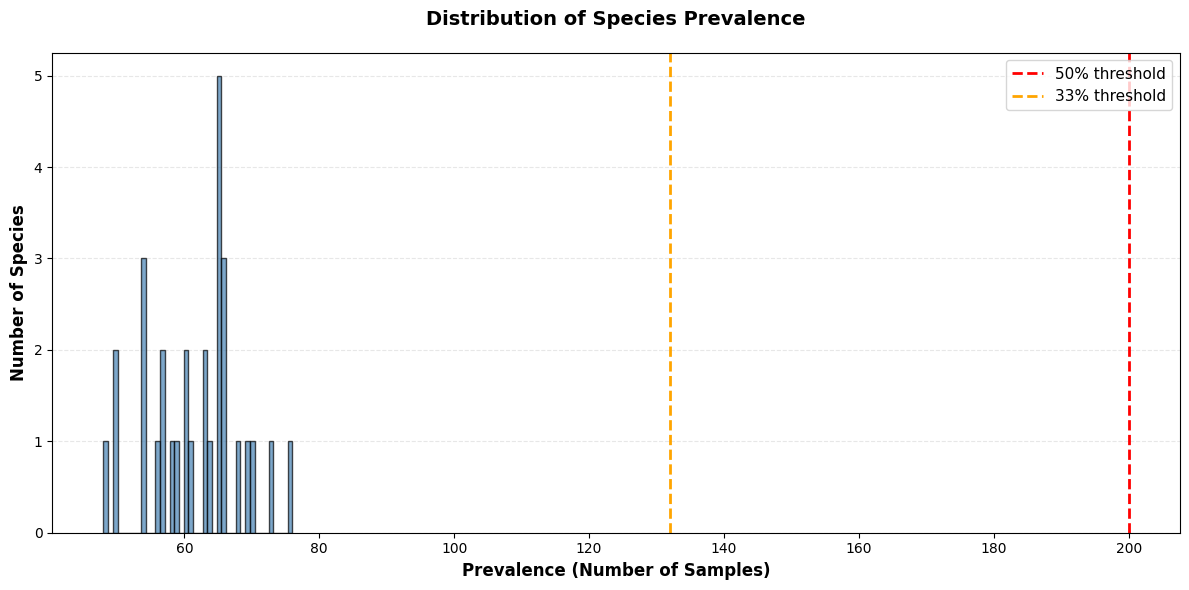

In [12]:
# Analysis at different prevalence thresholds
total_samples = df_abundance.shape[0]

print('\n' + '='*60)
print('Core microbiome at different prevalence thresholds:')
print('='*60)

thresholds = [0.25, 0.33, 0.50, 0.75, 0.90]
for threshold in thresholds:
    threshold_value = total_samples * threshold
    species_at_threshold = species_prevalence[species_prevalence > threshold_value]
    print(f'\n>{threshold*100:.0f}% prevalence (>{threshold_value:.0f} samples): {len(species_at_threshold)} species')
    if len(species_at_threshold) > 0 and len(species_at_threshold) <= 10:
        print(f'  Species: {list(species_at_threshold.index)}')

# Visualize prevalence distribution
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(species_prevalence, bins=40, color='steelblue', edgecolor='black', alpha=0.7)
ax.axvline(total_samples * 0.5, color='red', linestyle='--', linewidth=2, label='50% threshold')
ax.axvline(total_samples * 0.33, color='orange', linestyle='--', linewidth=2, label='33% threshold')
ax.set_xlabel('Prevalence (Number of Samples)', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Species', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Species Prevalence', fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig('../HW1/output/core_microbiome_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


In [16]:
df_metadata.head()

,Age,BMI,Gender,DiseaseStatus
SampleID,,,,
MB-4150,39,14.1,1,0
MB-4893,72,14.1,1,0
MB-4427,68,14.2,1,0
MB-4084,44,14.3,1,0
MB-1569,61,14.3,1,0


In [20]:
# Count males and females in gender column
gender_column = df_metadata['Gender']

count_males = (gender_column == 1).sum() #number of males
count_females = (gender_column == 0).sum() # number of females

print('Gender Analysis:')
print(f'Number of males: {count_males}')
print(f'Number of females: {count_females}')


Gender Column Analysis:
Number of 1s: 294
Number of 0s: 106

Value counts:
Gender
0    106
1    294
Name: count, dtype: int64


In [ ]:
# Age analysis of the cohort
age_column = df_metadata['Age']

mean_age = age_column.mean()
median_age = age_column.median()
min_age = age_column.min()
max_age = age_column.max()

print('\nAge Analysis:')
print(f'Mean age: {mean_age:.2f}')
print(f'Median age: {median_age}')
print(f'Min age: {min_age}')
print(f'Max age: {max_age}')


Age Analysis:
Mean age: 50.22
Median age: 50.5
Min age: 15
Max age: 82


AGE ANALYSIS BY GENDER

MALE STATISTICS:
  Count: 294
  Mean age: 50.46 years
  Median age: 50.00 years
  Std Dev: 12.22 years
  Min age: 15 years
  Max age: 82 years

FEMALE STATISTICS:
  Count: 106
  Mean age: 49.56 years
  Median age: 52.00 years
  Std Dev: 14.70 years
  Min age: 15 years
  Max age: 79 years


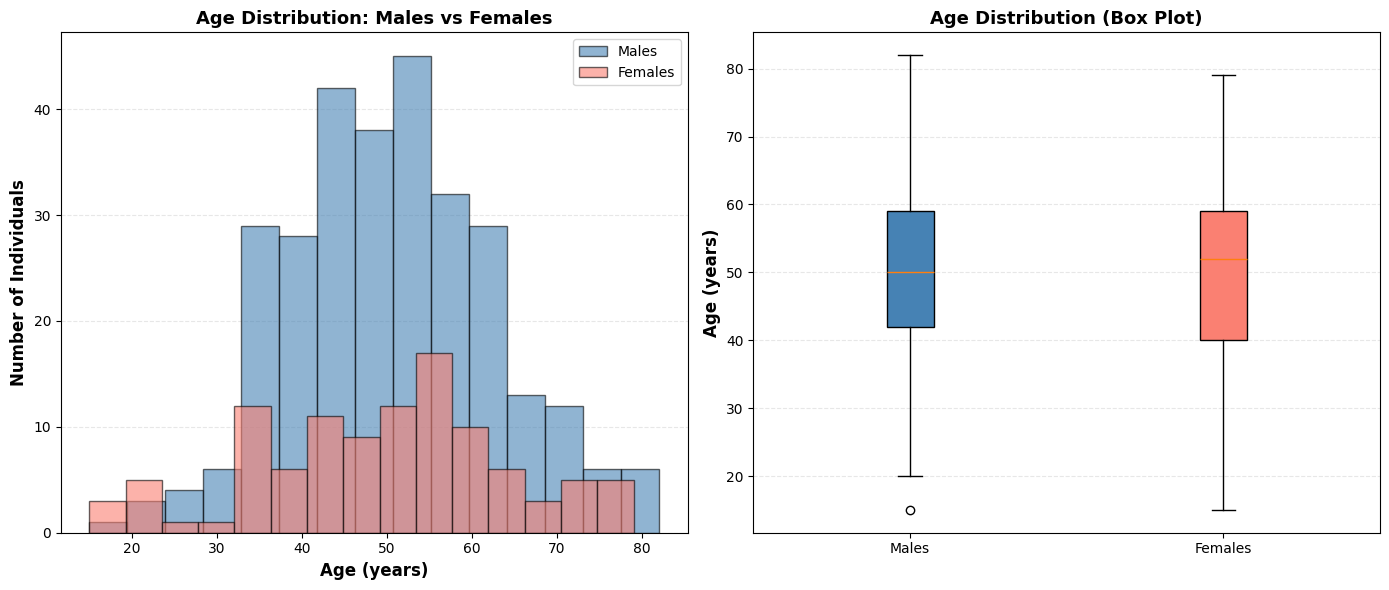


COMPARISON SUMMARY:
Age difference (Mean):    0.90 years
Age difference (Median):  2.00 years


In [38]:
# Age comparison between males and females
print('='*60)
print('AGE ANALYSIS BY GENDER')
print('='*60)

# Separate ages by gender
male_ages = df_metadata[df_metadata['Gender'] == 1]['Age']
female_ages = df_metadata[df_metadata['Gender'] == 0]['Age']

# Statistics for males
print('\nMALE STATISTICS:')
print(f'  Count: {len(male_ages)}')
print(f'  Mean age: {male_ages.mean():.2f} years')
print(f'  Median age: {male_ages.median():.2f} years')
print(f'  Std Dev: {male_ages.std():.2f} years')
print(f'  Min age: {male_ages.min():.0f} years')
print(f'  Max age: {male_ages.max():.0f} years')

# Statistics for females
print('\nFEMALE STATISTICS:')
print(f'  Count: {len(female_ages)}')
print(f'  Mean age: {female_ages.mean():.2f} years')
print(f'  Median age: {female_ages.median():.2f} years')
print(f'  Std Dev: {female_ages.std():.2f} years')
print(f'  Min age: {female_ages.min():.0f} years')
print(f'  Max age: {female_ages.max():.0f} years')

# Create comparison visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram comparison
axes[0].hist(male_ages, bins=15, alpha=0.6, label='Males', color='steelblue', edgecolor='black')
axes[0].hist(female_ages, bins=15, alpha=0.6, label='Females', color='salmon', edgecolor='black')
axes[0].set_xlabel('Age (years)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Individuals', fontsize=12, fontweight='bold')
axes[0].set_title('Age Distribution: Males vs Females', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')
axes[0].set_axisbelow(True)

# Box plot comparison
box_data = [male_ages, female_ages]
bp = axes[1].boxplot(box_data, tick_labels=['Males', 'Females'], patch_artist=True)
bp['boxes'][0].set_facecolor('steelblue')
bp['boxes'][1].set_facecolor('salmon')
for box in bp['boxes']:
    box.set_edgecolor('black')
axes[1].set_ylabel('Age (years)', fontsize=12, fontweight='bold')
axes[1].set_title('Age Distribution (Box Plot)', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3, linestyle='--')
axes[1].set_axisbelow(True)

plt.tight_layout()
plt.savefig('../HW1/output/age_by_gender_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(f'\n{"="*60}')
print('COMPARISON SUMMARY:')
print(f'{"="*60}')
print(f'Age difference (Mean):    {abs(male_ages.mean() - female_ages.mean()):.2f} years')
print(f'Age difference (Median):  {abs(male_ages.median() - female_ages.median()):.2f} years')

In [41]:
# Statistical tests to compare age distribution between males and females
from scipy import stats

print('\n' + '='*60)
print('STATISTICAL TESTING: MALES vs FEMALES AGE COMPARISON')
print('='*60)

# ========== ASSUMPTION CHECKS ==========
print('\n1. NORMALITY TEST (Shapiro-Wilk Test):')
print('-' * 60)

stat_male_norm, p_male_norm = stats.shapiro(male_ages)
stat_female_norm, p_female_norm = stats.shapiro(female_ages)

print(f'  Males:    W-statistic = {stat_male_norm:.4f}, p-value = {p_male_norm:.4f}')
if p_male_norm > 0.05:
    male_normal = True
    print(f'           → Data appear NORMALLY DISTRIBUTED (p > 0.05)')
else:
    male_normal = False
    print(f'           → Data are NOT normally distributed (p ≤ 0.05)')

print(f'\n  Females:  W-statistic = {stat_female_norm:.4f}, p-value = {p_female_norm:.4f}')
if p_female_norm > 0.05:
    female_normal = True
    print(f'           → Data appear NORMALLY DISTRIBUTED (p > 0.05)')
else:
    female_normal = False
    print(f'           → Data are NOT normally distributed (p ≤ 0.05)')

# ========== EQUAL VARIANCE TEST ==========
print(f'\n2. EQUAL VARIANCE TEST (Levene\'s Test):')
print('-' * 60)

stat_levene, p_levene = stats.levene(male_ages, female_ages)
print(f'  Levene Test: F-statistic = {stat_levene:.4f}, p-value = {p_levene:.4f}')

if p_levene > 0.05:
    equal_var = True
    print(f'  → Variances are EQUAL (p > 0.05)')
else:
    equal_var = False
    print(f'  → Variances are NOT equal (p ≤ 0.05)')

# ========== CHOOSE APPROPRIATE TEST ==========
print(f'\n3. TEST SELECTION:')
print('-' * 60)

normality_met = male_normal and female_normal

if normality_met and equal_var:
    test_type = 'Parametric: Student\'s t-test'
    t_statistic, p_value = stats.ttest_ind(male_ages, female_ages, equal_var=True)
    print(f'  Both normality and equal variance assumptions met')
    print(f'  → Using: {test_type}')
elif normality_met and not equal_var:
    test_type = 'Parametric: Welch\'s t-test'
    t_statistic, p_value = stats.ttest_ind(male_ages, female_ages, equal_var=False)
    print(f'  Normality met but variances unequal')
    print(f'  → Using: {test_type}')
else:
    test_type = 'Non-parametric: Mann-Whitney U test'
    t_statistic, p_value = stats.mannwhitneyu(male_ages, female_ages, alternative='two-sided')
    print(f'  Normality assumption violated')
    print(f'  → Using: {test_type}')

# ========== TEST RESULTS ==========
print(f'\n4. TEST RESULTS ({test_type}):')
print('-' * 60)

print(f'\nNull Hypothesis: There is no significant difference in age between males and females')
print(f'\nTest Statistic: {t_statistic:.4f}')
print(f'P-value: {p_value:.4f}')
print(f'Significance level: α = 0.05')

# Interpret results
if p_value < 0.05:
    print(f'\n✓ Result: STATISTICALLY SIGNIFICANT (p < 0.05)')
    print(f'  → Reject the null hypothesis')
    print(f'  → There IS a significant difference in age between males and females')
else:
    print(f'\n✗ Result: NOT STATISTICALLY SIGNIFICANT (p ≥ 0.05)')
    print(f'  → Fail to reject the null hypothesis')
    print(f'  → There is NO significant difference in age between males and females')

# ========== DESCRIPTIVE STATISTICS ==========
print(f'\n5. DESCRIPTIVE STATISTICS:')
print('-' * 60)
print(f'  Males:    Mean = {male_ages.mean():.2f}, SD = {male_ages.std():.2f}, N = {len(male_ages)}')
print(f'  Females:  Mean = {female_ages.mean():.2f}, SD = {female_ages.std():.2f}, N = {len(female_ages)}')
print(f'  Difference in means: {male_ages.mean() - female_ages.mean():.2f} years')


STATISTICAL TESTING: MALES vs FEMALES AGE COMPARISON

1. NORMALITY TEST (Shapiro-Wilk Test):
------------------------------------------------------------
  Males:    W-statistic = 0.9940, p-value = 0.2917
           → Data appear NORMALLY DISTRIBUTED (p > 0.05)

  Females:  W-statistic = 0.9802, p-value = 0.1142
           → Data appear NORMALLY DISTRIBUTED (p > 0.05)

2. EQUAL VARIANCE TEST (Levene's Test):
------------------------------------------------------------
  Levene Test: F-statistic = 4.1505, p-value = 0.0423
  → Variances are NOT equal (p ≤ 0.05)

3. TEST SELECTION:
------------------------------------------------------------
  Normality met but variances unequal
  → Using: Parametric: Welch's t-test

4. TEST RESULTS (Parametric: Welch's t-test):
------------------------------------------------------------

Null Hypothesis: There is no significant difference in age between males and females

Test Statistic: 0.5633
P-value: 0.5740
Significance level: α = 0.05

✗ Result: NO


SPECIES COMPARISON: MALES vs FEMALES

TOP 3 MOST PREVALENT SPECIES - MALES:
  1. Lactobacillus acidophilus      -  61 out of 294 samples (20.7%)
  2. Escherichia coli               -  55 out of 294 samples (18.7%)
  3. Bifidobacterium bifidum        -  54 out of 294 samples (18.4%)

TOP 3 MOST PREVALENT SPECIES - FEMALES:
  1. Phocaeicola_A sp900765575      -  24 out of 106 samples (22.6%)
  2. Merdibacter merdipullorum      -  20 out of 106 samples (18.9%)
  3. Bifidobacterium bifidum        -  19 out of 106 samples (17.9%)

TOP 3 MOST ABUNDANT SPECIES - MALES:
  1. Lactobacillus acidophilus      - Mean abundance: 0.0522%
  2. Ruminococcus_E bromii_B        - Mean abundance: 0.0421%
  3. Dialister invisus              - Mean abundance: 0.0419%

TOP 3 MOST ABUNDANT SPECIES - FEMALES:
  1. Phocaeicola_A sp900765575      - Mean abundance: 0.0548%
  2. Bifidobacterium bifidum        - Mean abundance: 0.0514%
  3. Bifidobacterium longum         - Mean abundance: 0.0489%

OVERLAP ANALYSIS 

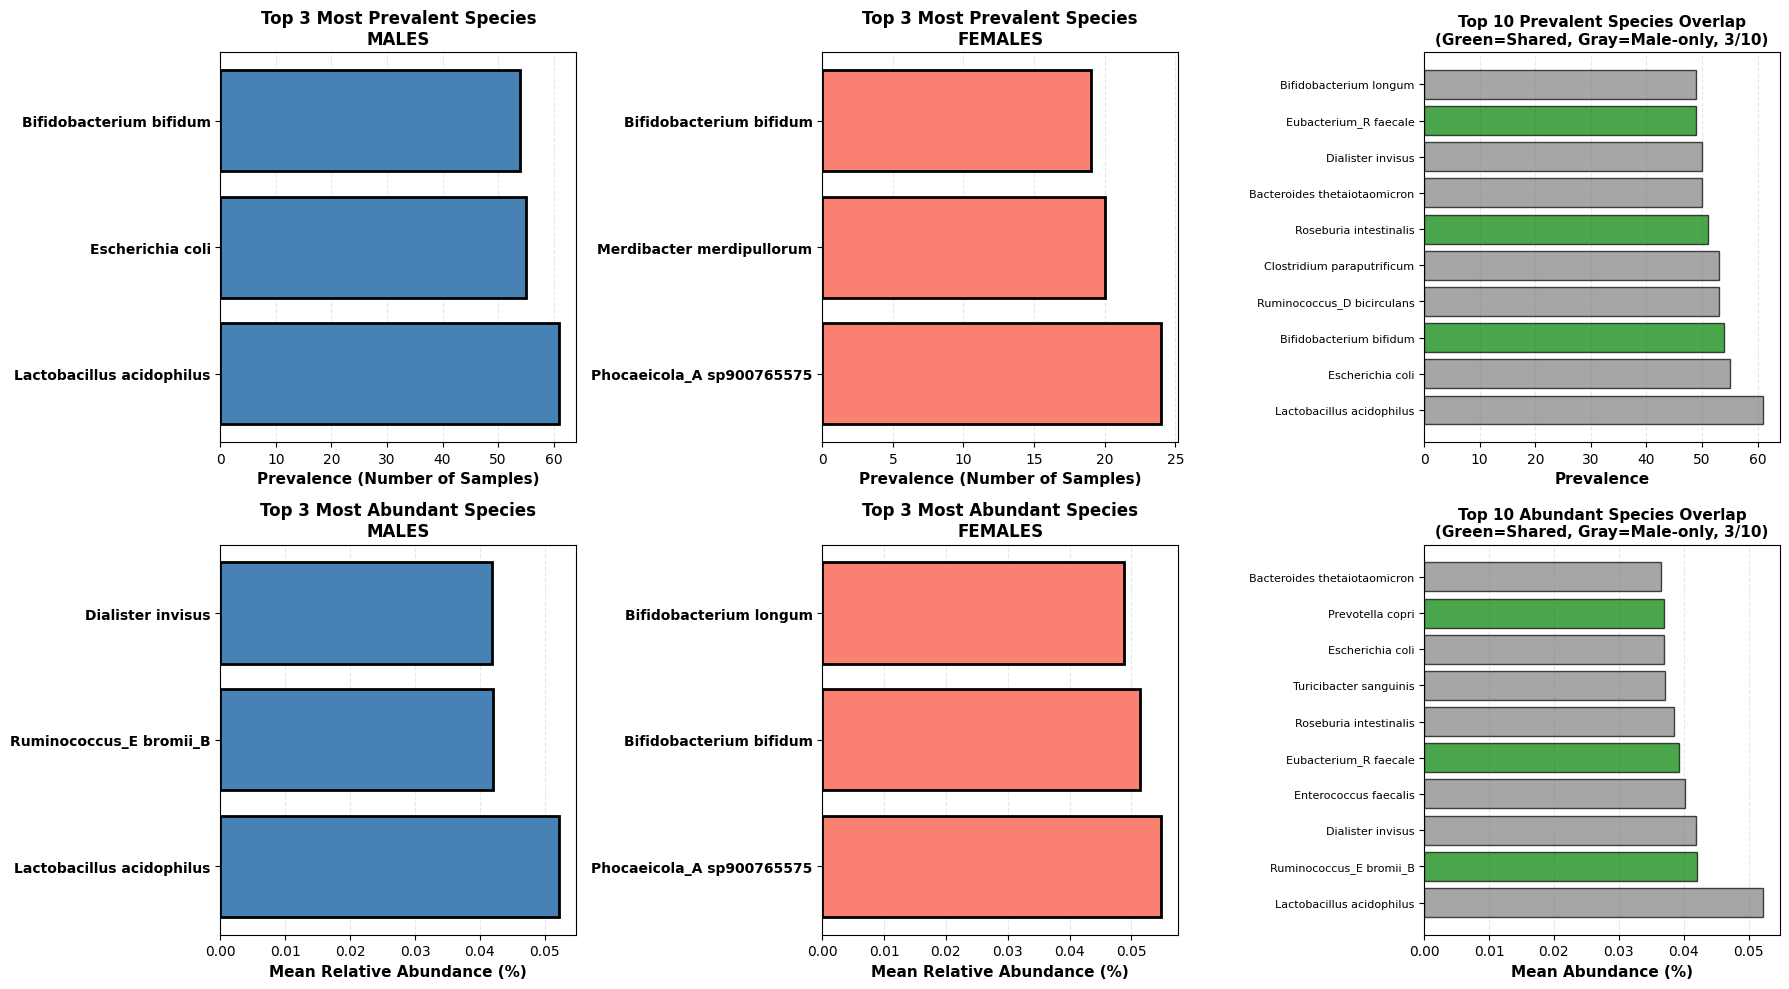


Plot saved to: ../HW1/output/species_comparison_by_gender.png


In [42]:
# Compare most prevalent and abundant species between males and females
print('\n' + '='*70)
print('SPECIES COMPARISON: MALES vs FEMALES')
print('='*70)

# Get male and female sample indices
male_samples = df_metadata[df_metadata['Gender'] == 1].index
female_samples = df_metadata[df_metadata['Gender'] == 0].index

# Separate abundance data by gender
df_male_abundance = df_abundance.loc[male_samples]
df_female_abundance = df_abundance.loc[female_samples]

# Calculate prevalence and mean abundance for males
male_prevalence = (df_male_abundance > 0).sum(axis=0)
male_mean_abundance = df_male_abundance.mean(axis=0)

# Calculate prevalence and mean abundance for females
female_prevalence = (df_female_abundance > 0).sum(axis=0)
female_mean_abundance = df_female_abundance.mean(axis=0)

# Top 3 prevalent species for each gender
top3_male_prev = male_prevalence.sort_values(ascending=False).head(3)
top3_female_prev = female_prevalence.sort_values(ascending=False).head(3)

print('\nTOP 3 MOST PREVALENT SPECIES - MALES:')
for i, (species, prev) in enumerate(top3_male_prev.items(), 1):
    print(f'  {i}. {species:30s} - {prev:3d} out of {len(male_samples)} samples ({prev/len(male_samples)*100:.1f}%)')

print('\nTOP 3 MOST PREVALENT SPECIES - FEMALES:')
for i, (species, prev) in enumerate(top3_female_prev.items(), 1):
    print(f'  {i}. {species:30s} - {prev:3d} out of {len(female_samples)} samples ({prev/len(female_samples)*100:.1f}%)')

# Top 3 abundant species for each gender
top3_male_abund = male_mean_abundance.sort_values(ascending=False).head(3)
top3_female_abund = female_mean_abundance.sort_values(ascending=False).head(3)

print('\nTOP 3 MOST ABUNDANT SPECIES - MALES:')
for i, (species, abund) in enumerate(top3_male_abund.items(), 1):
    print(f'  {i}. {species:30s} - Mean abundance: {abund:.4f}%')

print('\nTOP 3 MOST ABUNDANT SPECIES - FEMALES:')
for i, (species, abund) in enumerate(top3_female_abund.items(), 1):
    print(f'  {i}. {species:30s} - Mean abundance: {abund:.4f}%')

# Top 10 for overlap analysis
top10_male_prev = male_prevalence.sort_values(ascending=False).head(10)
top10_female_prev = female_prevalence.sort_values(ascending=False).head(10)
top10_male_abund = male_mean_abundance.sort_values(ascending=False).head(10)
top10_female_abund = female_mean_abundance.sort_values(ascending=False).head(10)

# Find overlap
overlap_top10_prev = set(top10_male_prev.index) & set(top10_female_prev.index)
overlap_top10_abund = set(top10_male_abund.index) & set(top10_female_abund.index)

print(f'\n{"="*70}')
print('OVERLAP ANALYSIS (Top 10):')
print(f'{"="*70}')
print(f'Overlap in Top 10 Most Prevalent Species: {len(overlap_top10_prev)}/10')
print(f'  Shared species: {", ".join(list(overlap_top10_prev)[:5]) if overlap_top10_prev else "None"}{"..." if len(overlap_top10_prev) > 5 else ""}')

print(f'\nOverlap in Top 10 Most Abundant Species: {len(overlap_top10_abund)}/10')
print(f'  Shared species: {", ".join(list(overlap_top10_abund)[:5]) if overlap_top10_abund else "None"}{"..." if len(overlap_top10_abund) > 5 else ""}')

# Visualization with overlap
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot 1: Top 3 prevalent species - Males
axes[0, 0].barh(range(len(top3_male_prev)), top3_male_prev.values, color='steelblue', edgecolor='black', linewidth=2)
axes[0, 0].set_yticks(range(len(top3_male_prev)))
axes[0, 0].set_yticklabels(top3_male_prev.index, fontsize=10, fontweight='bold')
axes[0, 0].set_xlabel('Prevalence (Number of Samples)', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Top 3 Most Prevalent Species\nMALES', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3, linestyle='--')
axes[0, 0].set_axisbelow(True)

# Plot 2: Top 3 prevalent species - Females
axes[0, 1].barh(range(len(top3_female_prev)), top3_female_prev.values, color='salmon', edgecolor='black', linewidth=2)
axes[0, 1].set_yticks(range(len(top3_female_prev)))
axes[0, 1].set_yticklabels(top3_female_prev.index, fontsize=10, fontweight='bold')
axes[0, 1].set_xlabel('Prevalence (Number of Samples)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Top 3 Most Prevalent Species\nFEMALES', fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3, linestyle='--')
axes[0, 1].set_axisbelow(True)

# Plot 3: Overlap visualization for prevalence (Top 10)
overlap_prev_colors = ['green' if sp in overlap_top10_prev else 'gray' for sp in top10_male_prev.index]
axes[0, 2].barh(range(len(top10_male_prev)), top10_male_prev.values, color=overlap_prev_colors, edgecolor='black', alpha=0.7)
axes[0, 2].set_yticks(range(len(top10_male_prev)))
axes[0, 2].set_yticklabels(top10_male_prev.index, fontsize=8)
axes[0, 2].set_xlabel('Prevalence', fontsize=11, fontweight='bold')
axes[0, 2].set_title(f'Top 10 Prevalent Species Overlap\n(Green=Shared, Gray=Male-only, {len(overlap_top10_prev)}/10)', fontsize=11, fontweight='bold')
axes[0, 2].grid(axis='x', alpha=0.3, linestyle='--')
axes[0, 2].set_axisbelow(True)

# Plot 4: Top 3 abundant species - Males
axes[1, 0].barh(range(len(top3_male_abund)), top3_male_abund.values, color='steelblue', edgecolor='black', linewidth=2)
axes[1, 0].set_yticks(range(len(top3_male_abund)))
axes[1, 0].set_yticklabels(top3_male_abund.index, fontsize=10, fontweight='bold')
axes[1, 0].set_xlabel('Mean Relative Abundance (%)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Top 3 Most Abundant Species\nMALES', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3, linestyle='--')
axes[1, 0].set_axisbelow(True)

# Plot 5: Top 3 abundant species - Females
axes[1, 1].barh(range(len(top3_female_abund)), top3_female_abund.values, color='salmon', edgecolor='black', linewidth=2)
axes[1, 1].set_yticks(range(len(top3_female_abund)))
axes[1, 1].set_yticklabels(top3_female_abund.index, fontsize=10, fontweight='bold')
axes[1, 1].set_xlabel('Mean Relative Abundance (%)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Top 3 Most Abundant Species\nFEMALES', fontsize=12, fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3, linestyle='--')
axes[1, 1].set_axisbelow(True)

# Plot 6: Overlap visualization for abundance (Top 10)
overlap_abund_colors = ['green' if sp in overlap_top10_abund else 'gray' for sp in top10_male_abund.index]
axes[1, 2].barh(range(len(top10_male_abund)), top10_male_abund.values, color=overlap_abund_colors, edgecolor='black', alpha=0.7)
axes[1, 2].set_yticks(range(len(top10_male_abund)))
axes[1, 2].set_yticklabels(top10_male_abund.index, fontsize=8)
axes[1, 2].set_xlabel('Mean Abundance (%)', fontsize=11, fontweight='bold')
axes[1, 2].set_title(f'Top 10 Abundant Species Overlap\n(Green=Shared, Gray=Male-only, {len(overlap_top10_abund)}/10)', fontsize=11, fontweight='bold')
axes[1, 2].grid(axis='x', alpha=0.3, linestyle='--')
axes[1, 2].set_axisbelow(True)

plt.tight_layout()
plt.savefig('../HW1/output/species_comparison_by_gender.png', dpi=300, bbox_inches='tight')
plt.show()

print(f'\nPlot saved to: ../HW1/output/species_comparison_by_gender.png')

In [43]:
# Chi-square test of independence for Top 10 prevalence differences between genders
from scipy.stats import chi2_contingency, fisher_exact
import pandas as pd

print('\n' + '='*70)
print('CHI-SQUARE / FISHER ANALYSIS: Top 10 Prevalence Differences')
print('='*70)

# Use the top10 prevalence lists computed previously (top10_male_prev, top10_female_prev)
union_top10_prev = list(dict.fromkeys(list(top10_male_prev.index) + list(top10_female_prev.index)))

# Build 2 x N contingency table (rows: males, females; cols: species)
male_counts = [int(male_prevalence.get(sp, 0)) for sp in union_top10_prev]
female_counts = [int(female_prevalence.get(sp, 0)) for sp in union_top10_prev]
contingency_table = np.vstack([male_counts, female_counts])

# Overall chi-square test on the 2 x N table
chi2, p_overall, dof, expected = chi2_contingency(contingency_table)

print(f'Overall Chi-square test on 2 x {len(union_top10_prev)} table:')
print(f'  Chi2 = {chi2:.4f}, p-value = {p_overall:.4e}, dof = {dof}')

# Warn if expected frequencies are small
min_expected = expected.min()
if min_expected < 5:
    print('\nWARNING: Some expected frequencies < 5 (minimum = {:.2f}).'.format(min_expected))
    print('  The chi-square approximation may be inaccurate for the overall test.')

# Per-species tests (2x2): presence vs absence by gender
results = []
for sp in union_top10_prev:
    a = int(male_prevalence.get(sp, 0))
    b = len(male_samples) - a
    c = int(female_prevalence.get(sp, 0))
    d = len(female_samples) - c
    table_2x2 = np.array([[a, b], [c, d]])
    # If any expected cell < 5, use Fisher's exact test
    exp = chi2_contingency(table_2x2, lambda_="log") if False else None
    # compute expected for 2x2 to check
    _, _, _, exp_cells = chi2_contingency(table_2x2)
    if (exp_cells < 5).any():
        # Use Fisher's exact (two-sided)
        oddsratio, pval = fisher_exact(table_2x2, alternative='two-sided')
        test_used = 'Fisher_exact'
        stat = oddsratio
    else:
        chi2_sp, pval, dof_sp, exp_sp = chi2_contingency(table_2x2)
        test_used = 'Chi2'
        stat = chi2_sp
    results.append({
        'species': sp,
        'male_present': a,
        'male_absent': b,
        'female_present': c,
        'female_absent': d,
        'test': test_used,
        'statistic': stat,
        'p_value': pval
    })

results_df = pd.DataFrame(results).sort_values('p_value')
results_df['p_adj_bonf'] = results_df['p_value'] * len(results_df)
results_df['p_adj_bonf'] = results_df['p_adj_bonf'].clip(upper=1.0)

# Save summary
out_path = '../HW1/output/top10_chi_square_results.csv'
results_df.to_csv(out_path, index=False)

print('\nPer-species results (sorted by p-value):')
print(results_df[['species','test','statistic','p_value','p_adj_bonf']].to_string(index=False))
print(f'\nResults saved to: {out_path}')


CHI-SQUARE / FISHER ANALYSIS: Top 10 Prevalence Differences
Overall Chi-square test on 2 x 17 table:
  Chi2 = 13.2400, p-value = 6.5514e-01, dof = 16

Per-species results (sorted by p-value):
                      species test  statistic  p_value  p_adj_bonf
    Phocaeicola_A sp900765575 Chi2   3.365002 0.066596         1.0
    Merdibacter merdipullorum Chi2   2.315006 0.128131         1.0
   Clostridium paraputrificum Chi2   2.105582 0.146762         1.0
    Lactobacillus acidophilus Chi2   1.795577 0.180248         1.0
             Escherichia coli Chi2   1.288195 0.256381         1.0
   Ruminococcus_D bicirculans Chi2   0.577671 0.447227         1.0
 Bacteroides thetaiotaomicron Chi2   0.280638 0.596283         1.0
           Bacteroides ovatus Chi2   0.204412 0.651183         1.0
Phascolarctobacterium faecium Chi2   0.204412 0.651183         1.0
            Dialister invisus Chi2   0.091308 0.762521         1.0
             Prevotella copri Chi2   0.062683 0.802305         1.0
   

In [44]:
df_mag_data.head()

,species,domain,phylum,class,order,family,genus,sp
sample_names,,,,,,,,
MB-2860_metabat_26,Akkermansia muciniphila,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,Akkermansia muciniphila
MB-5397_maxbin_15,Bacteroides thetaiotaomicron,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides thetaiotaomicron
MB-9404_vamb_15,Escherichia coli,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,Escherichia coli
MB-3546_metabat_11,Turicibacter sanguinis,Bacteria,Bacillota,Bacilli,Haloplasmatales,Turicibacteraceae,Turicibacter,Turicibacter sanguinis
MB-5530_metabat_12,Enterococcus faecalis,Bacteria,Bacillota,Bacilli,Lactobacillales,Enterococcaceae,Enterococcus,Enterococcus faecalis


In [48]:
# Taxonomic aggregation at multiple levels: Genus, Family, Order, Phylum
print('='*70)
print('TAXONOMIC AGGREGATION AT MULTIPLE LEVELS')
print('='*70)

# Create a species-to-taxonomy mapping from mag_data
# We need to match species names from df_abundance to those in df_mag_data

# Build mapping: species -> {genus, family, order, phylum}
species_taxonomy = {}
matched_count = 0
unmatched_species = []

for sp in df_abundance.columns:
    # Look up this species in mag_data (try exact match first, then partial)
    matches = df_mag_data[df_mag_data['species'] == sp]
    
    if len(matches) > 0:
        row = matches.iloc[0]
        species_taxonomy[sp] = {
            'phylum': str(row['phylum']),
            'order': str(row['order']),
            'family': str(row['family']),
            'genus': str(row['genus'])
        }
        matched_count += 1
    else:
        # Try partial match (genus level)
        genus_part = sp.split()[0] if ' ' in sp else sp
        genus_matches = df_mag_data[df_mag_data['genus'].str.contains(genus_part, na=False, case=False)]
        if len(genus_matches) > 0:
            row = genus_matches.iloc[0]
            species_taxonomy[sp] = {
                'phylum': str(row['phylum']),
                'order': str(row['order']),
                'family': str(row['family']),
                'genus': str(row['genus'])
            }
            matched_count += 1
        else:
            species_taxonomy[sp] = {
                'phylum': 'Unknown',
                'order': 'Unknown',
                'family': 'Unknown',
                'genus': 'Unknown'
            }
            unmatched_species.append(sp)

print(f"\nSpecies-to-taxonomy mapping:")
print(f"  Total species in abundance table: {len(species_taxonomy)}")
print(f"  Successfully matched: {matched_count}")
print(f"  Unmatched: {len(unmatched_species)}")
if unmatched_species:
    print(f"  Unmatched species: {unmatched_species}")

# Function to aggregate abundance data at a given taxonomic level
def aggregate_at_level(df_abundance, taxonomy_map, level):
    """Aggregate species abundances to a specific taxonomic level"""
    aggregated = pd.DataFrame(index=df_abundance.index)
    for species in df_abundance.columns:
        tax_group = taxonomy_map.get(species, {}).get(level, 'Unknown')
        if tax_group not in aggregated.columns:
            aggregated[tax_group] = 0.0
        aggregated[tax_group] += df_abundance[species].values
    return aggregated

# Aggregate at each level
genus_abundance = aggregate_at_level(df_abundance, species_taxonomy, 'genus')
family_abundance = aggregate_at_level(df_abundance, species_taxonomy, 'family')
order_abundance = aggregate_at_level(df_abundance, species_taxonomy, 'order')
phylum_abundance = aggregate_at_level(df_abundance, species_taxonomy, 'phylum')

print(f"\nAggregation results:")
print(f"  Genus level:    {genus_abundance.shape[1]:3d} taxa from {len(df_abundance.index)} samples")
print(f"  Family level:   {family_abundance.shape[1]:3d} taxa from {len(df_abundance.index)} samples")
print(f"  Order level:    {order_abundance.shape[1]:3d} taxa from {len(df_abundance.index)} samples")
print(f"  Phylum level:   {phylum_abundance.shape[1]:3d} taxa from {len(df_abundance.index)} samples")

# Calculate prevalence and mean abundance at each level
def calc_prevalence_abundance(df):
    """Calculate prevalence and mean abundance for aggregated data"""
    prevalence = (df > 0).sum(axis=0)
    mean_abundance = df.mean(axis=0)
    return prevalence, mean_abundance

genus_prev, genus_mean = calc_prevalence_abundance(genus_abundance)
family_prev, family_mean = calc_prevalence_abundance(family_abundance)
order_prev, order_mean = calc_prevalence_abundance(order_abundance)
phylum_prev, phylum_mean = calc_prevalence_abundance(phylum_abundance)

# Summary statistics
print(f"\n{'='*70}")
print(f"{'Level':<15} {'Count':<8} {'Max Prev':<12} {'Mean Abund':<15} {'Max Abund':<15}")
print(f"{'='*70}")
for level, prev, mean in [('Genus', genus_prev, genus_mean),
                           ('Family', family_prev, family_mean),
                           ('Order', order_prev, order_mean),
                           ('Phylum', phylum_prev, phylum_mean)]:
    print(f"{level:<15} {len(prev):<8} {prev.max():<12} {mean.mean():.6f}           {mean.max():.6f}")
print(f"{'='*70}")

TAXONOMIC AGGREGATION AT MULTIPLE LEVELS

Species-to-taxonomy mapping:
  Total species in abundance table: 30
  Successfully matched: 30
  Unmatched: 0

Aggregation results:
  Genus level:     26 taxa from 400 samples
  Family level:    20 taxa from 400 samples
  Order level:     14 taxa from 400 samples
  Phylum level:     8 taxa from 400 samples

Level           Count    Max Prev     Mean Abund      Max Abund      
Genus           26       180          0.038462           0.119526
Family          20       261          0.050000           0.214556
Order           14       294          0.071429           0.273441
Phylum          8        294          0.125000           0.273441


In [58]:
# ADVANCED HIERARCHICAL VISUALIZATION: Sankey & Sunburst Diagrams
import plotly.graph_objects as go
import collections

print('='*80)
print('PHYLUM-LEVEL ANALYSIS: HIERARCHICAL TAXONOMIC RELATIONSHIPS')
print('='*80)

# Get phylum data
phylum_data = phylum_summary.sort_values('Prevalence', ascending=False)

print(f"\nTotal phyla detected: {len(phylum_data)}")
print(f"Samples analyzed: {len(df_abundance)}")

# Summary statistics for phyla
print(f"\n{'-'*80}")
print('PHYLUM PREVALENCE AND ABUNDANCE STATISTICS')
print(f"{'-'*80}")
print(f"{'Phylum':<30} {'Samples':<12} {'Percent':<12} {'Mean Abund':<15}")
print(f"{'-'*80}")
for idx, row in phylum_data.iterrows():
    print(f"{row['Taxon']:<30} {int(row['Prevalence']):<12} {row['Prevalence_Percent']:>10.1f}%  {row['Mean_Abundance']:>13.6f}")

# Calculate cumulative prevalence
phylum_data_sorted = phylum_data.sort_values('Mean_Abundance', ascending=False)
cumsum_abundance = phylum_data_sorted['Mean_Abundance'].cumsum()
cumsum_percent = (cumsum_abundance / phylum_data_sorted['Mean_Abundance'].sum()) * 100

print(f"\n{'-'*80}")
print('KEY FINDINGS')
print(f"{'-'*80}")
print(f"✓ Most prevalent: {phylum_data.iloc[0]['Taxon']} in {int(phylum_data.iloc[0]['Prevalence'])}/{len(df_abundance)} samples ({phylum_data.iloc[0]['Prevalence_Percent']:.1f}%)")
print(f"✓ Top 3 phyla account for: {cumsum_percent.iloc[2]:.1f}% of total abundance")
print(f"✓ Total phyla: {len(phylum_data)}")

# ==================== SANKEY DIAGRAM ====================
print(f"\n{'-'*80}")
print('Creating Sankey diagram: Phylum → Order → Family → Genus')
print(f"{'-'*80}")

# Get top taxa at each level
top_phyla = phylum_prev.sort_values(ascending=False).head(8).index.tolist()
top_orders = order_prev.sort_values(ascending=False).head(12).index.tolist()
top_families = family_prev.sort_values(ascending=False).head(15).index.tolist()
top_genera = genus_prev.sort_values(ascending=False).head(20).index.tolist()

# Create mappings from species to taxonomic levels
phylum_order_links = []
order_family_links = []
family_genus_links = []

for species in df_abundance.columns:
    if species not in species_taxonomy:
        continue
    tax_info = species_taxonomy[species]
    phylum = tax_info['phylum']
    order = tax_info['order']
    family = tax_info['family']
    genus = tax_info['genus']
    
    if phylum in top_phyla and order in top_orders:
        phylum_order_links.append({'source': phylum, 'target': order})
    if order in top_orders and family in top_families:
        order_family_links.append({'source': order, 'target': family})
    if family in top_families and genus in top_genera:
        family_genus_links.append({'source': family, 'target': genus})

# Aggregate flows
phylum_order_agg = collections.Counter((link['source'], link['target']) for link in phylum_order_links)
order_family_agg = collections.Counter((link['source'], link['target']) for link in order_family_links)
family_genus_agg = collections.Counter((link['source'], link['target']) for link in family_genus_links)

# Prepare nodes and links for Sankey
all_sources = list(set([k[0] for k in phylum_order_agg.keys()] + [k[0] for k in order_family_agg.keys()] + [k[0] for k in family_genus_agg.keys()]))
all_targets = list(set([k[1] for k in phylum_order_agg.keys()] + [k[1] for k in order_family_agg.keys()] + [k[1] for k in family_genus_agg.keys()]))
all_nodes = all_sources + all_targets
all_nodes = list(dict.fromkeys(all_nodes))

# Create indices and values
source_idx = [all_nodes.index(k[0]) for k in phylum_order_agg.keys()] + \
             [all_nodes.index(k[0]) for k in order_family_agg.keys()] + \
             [all_nodes.index(k[0]) for k in family_genus_agg.keys()]
target_idx = [all_nodes.index(k[1]) for k in phylum_order_agg.keys()] + \
             [all_nodes.index(k[1]) for k in order_family_agg.keys()] + \
             [all_nodes.index(k[1]) for k in family_genus_agg.keys()]
values = list(phylum_order_agg.values()) + list(order_family_agg.values()) + list(family_genus_agg.values())

# Create Sankey diagram
node_colors = ['#1f77b4' if node in top_phyla else '#ff7f0e' if node in top_orders else '#2ca02c' if node in top_families else '#d62728' for node in all_nodes]

fig_sankey = go.Figure(data=[go.Sankey(
    node=dict(pad=15, thickness=20, line=dict(color='black', width=0.5),
              label=all_nodes, color=node_colors),
    link=dict(source=source_idx, target=target_idx, value=values, color='rgba(200,200,200,0.4)')
)])

fig_sankey.update_layout(
    title="Taxonomic Flow: Phylum → Order → Family → Genus<br><sub>Showing relative relationships across hierarchical levels</sub>",
    font=dict(size=10, family='Arial'),
    height=700,
    width=1400,
    plot_bgcolor='white',
    paper_bgcolor='white'
)
fig_sankey.write_html('../HW1/output/taxonomic_sankey_diagram.html')
print('✓ Sankey diagram saved to: ../HW1/output/taxonomic_sankey_diagram.html')

# ==================== SUNBURST PLOT ====================
print(f"{'-'*80}")
print('Creating Sunburst plot: Hierarchical taxonomy visualization')
print(f"{'-'*80}")

# Build hierarchical data
sunburst_data = []
for species in df_abundance.columns:
    if species not in species_taxonomy:
        continue
    tax_info = species_taxonomy[species]
    sp_mean = species_mean_abundance[species]
    
    if sp_mean > 0:
        sunburst_data.append({
            'Phylum': tax_info['phylum'],
            'Order': tax_info['order'],
            'Family': tax_info['family'],
            'Genus': tax_info['genus'],
            'Species': species,
            'Value': sp_mean
        })

sunburst_df = pd.DataFrame(sunburst_data)

# Create hierarchical structure
labels = ['All Species']
parents = ['']
values = [sunburst_df['Value'].sum()]
colors = [0]

# Add phyla
for phylum in sorted(sunburst_df['Phylum'].unique()):
    labels.append(phylum)
    parents.append('All Species')
    phylum_sum = sunburst_df[sunburst_df['Phylum'] == phylum]['Value'].sum()
    values.append(phylum_sum)
    colors.append(phylum_sum)

# Add orders
for order in sorted(sunburst_df['Order'].unique()):
    labels.append(order)
    phylum = sunburst_df[sunburst_df['Order'] == order]['Phylum'].iloc[0]
    parents.append(phylum)
    order_sum = sunburst_df[sunburst_df['Order'] == order]['Value'].sum()
    values.append(order_sum)
    colors.append(order_sum)

# Add families
for family in sorted(sunburst_df['Family'].unique()):
    labels.append(family)
    order = sunburst_df[sunburst_df['Family'] == family]['Order'].iloc[0]
    parents.append(order)
    family_sum = sunburst_df[sunburst_df['Family'] == family]['Value'].sum()
    values.append(family_sum)
    colors.append(family_sum)

# Add top genera
top_gen_list = sunburst_df.groupby('Genus')['Value'].sum().nlargest(20).index.tolist()
for genus in top_gen_list:
    labels.append(genus)
    family = sunburst_df[sunburst_df['Genus'] == genus]['Family'].iloc[0]
    parents.append(family)
    genus_sum = sunburst_df[sunburst_df['Genus'] == genus]['Value'].sum()
    values.append(genus_sum)
    colors.append(genus_sum)

fig_sunburst = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    marker=dict(colors=colors, colorscale='Viridis', cmid=np.median(colors), 
                showscale=True, colorbar=dict(title="Mean Abundance")),
    hovertemplate='<b>%{label}</b><br>Abundance: %{value:.4f}<extra></extra>',
    textinfo='label+percent parent'
))

fig_sunburst.update_layout(
    title="Hierarchical Taxonomy: Phylum → Order → Family → Genus<br><sub>Circle size and color represent mean relative abundance</sub>",
    font=dict(size=11, family='Arial'),
    height=900,
    width=1200
)
fig_sunburst.write_html('../HW1/output/taxonomic_sunburst_plot.html')
print('✓ Sunburst plot saved to: ../HW1/output/taxonomic_sunburst_plot.html')

print(f"\n{'='*80}")
print('✓ Advanced visualizations completed successfully!')
print(f"{'='*80}")

PHYLUM-LEVEL ANALYSIS: HIERARCHICAL TAXONOMIC RELATIONSHIPS

Total phyla detected: 8
Samples analyzed: 400

--------------------------------------------------------------------------------
PHYLUM PREVALENCE AND ABUNDANCE STATISTICS
--------------------------------------------------------------------------------
Phylum                         Samples      Percent      Mean Abund     
--------------------------------------------------------------------------------
Bacteroidota                   294                73.5%       0.273441
Bacillota_A                    286                71.5%       0.238719
Bacillota                      240                60.0%       0.184555
Bacillota_C                    152                38.0%       0.103197
Actinomycetota                 127                31.8%       0.079685
Pseudomonadota                 112                28.0%       0.060963
Spirochaetota                  60                 15.0%       0.029076
Verrucomicrobiota              58   